In [ ]:
import sys, torch

sys.path.append('..')

from patchviz import DatasetLoader, ModelLoader, AdversarialPatch, Visualizer, Explainer, get_sample_model

c:\Me\Duke\Classes\Fall '24\PhD Apps\projects\patchit\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Me\Duke\Classes\Fall '24\PhD Apps\projects\patchit\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Me\Duke\Classes\Fall '24\PhD Apps\projects\patchit\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Batch size: 16
tensor([2, 2, 2, 0, 2, 5, 5, 5, 4, 5, 1, 3, 3, 4, 5, 3])


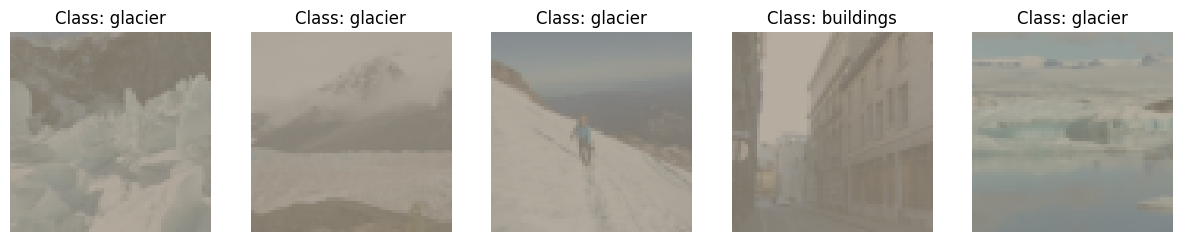

In [2]:
model_inst, num_classes, transform, data_dir, custom_weights = get_sample_model("intel")

loader = DatasetLoader(data_dir=data_dir,transform=transform)

# Get a sample batch
images, labels = loader.get_sample_batch()
print(f"Batch size: {len(images)}")

# Plot a sample batch
loader.plot_sample_batch()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Using a file for class labels
model_loader = ModelLoader(
    model_inst=model_inst,
    num_classes=num_classes,
    custom_weights=custom_weights,
    device=device
)

model = model_loader.model
# class_labels = model_loader.get_class_labels()

c:\Me\Duke\Classes\Fall '24\PhD Apps\projects\patchit\examples\..\patchit\model_loader.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(

Loaded custom weights from ../patchit/samples/models/intel-class.pth.


In [4]:
adv_patch = AdversarialPatch(
    model=model,
    loader=loader,
    device=device
)

In [5]:
patch_dict = adv_patch.get_patches(
    class_names=["sea"],
    patch_sizes=[48],
    num_epochs=1,
)

Validation results for sea and (48, 48): {'acc': 0.9914177656173706, 'top5': 1.0}


In [6]:
viz = Visualizer(
    idx_to_class=loader.idx_to_class,
    adv_patch=adv_patch,
    model=model,
)

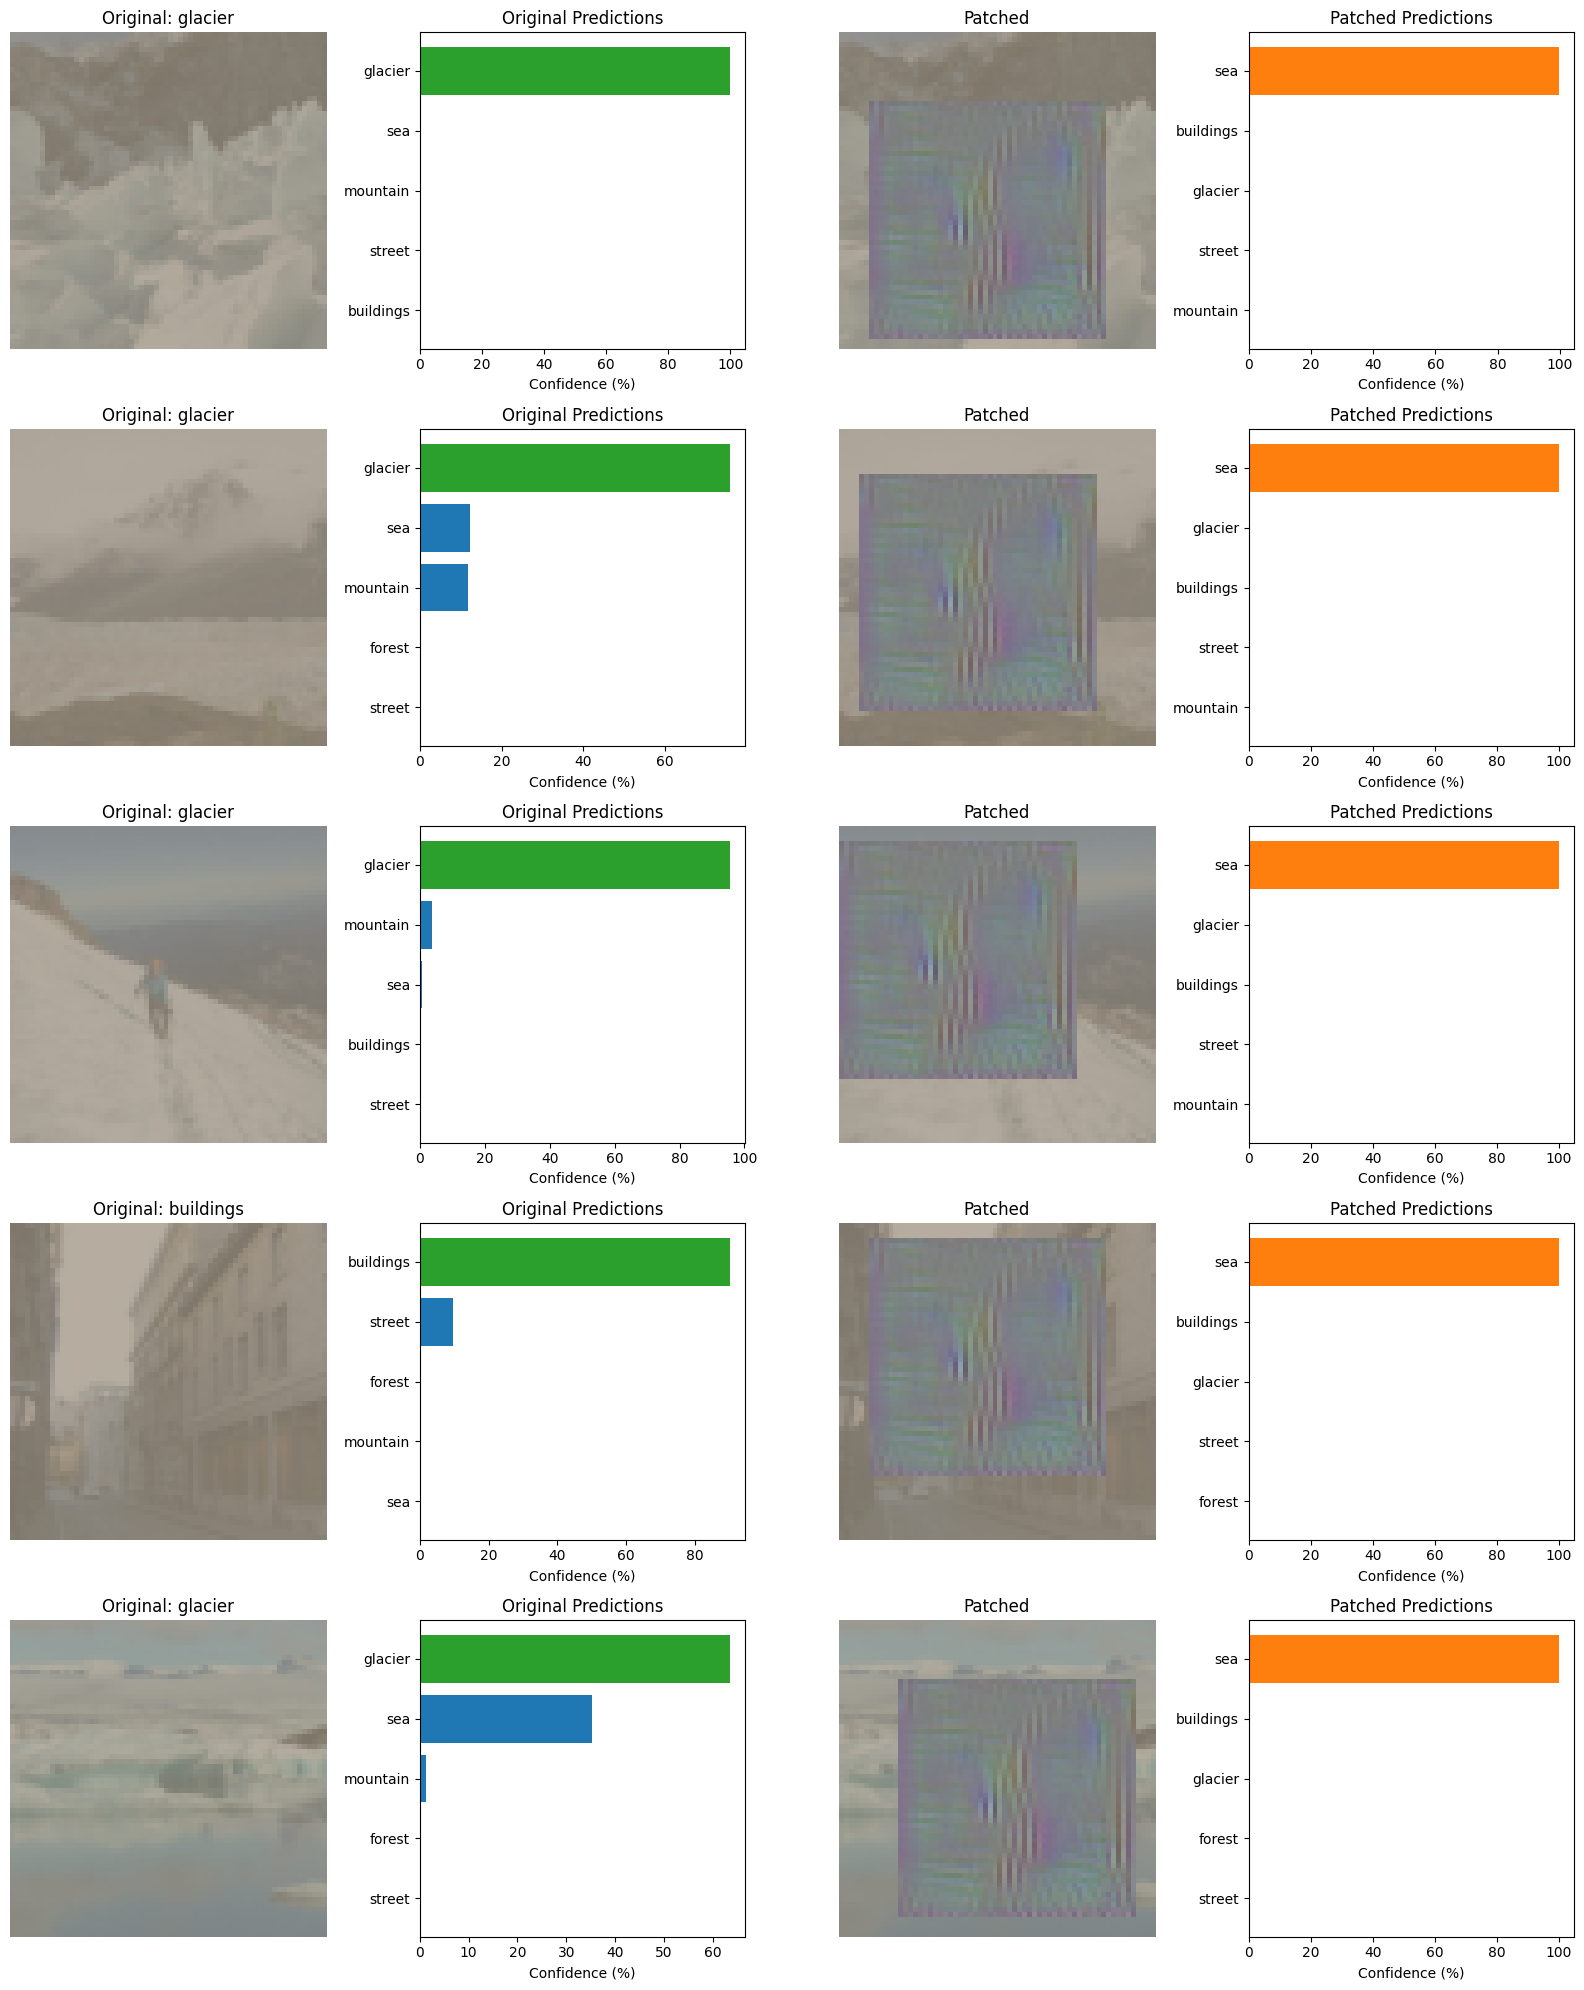

In [7]:
viz.show_predictions(
    images=images,
    labels=labels,
    patch=patch_dict["sea"][48]['patch'],
)

In [8]:
explainer = Explainer(
    model=model,
    adv_patch=adv_patch,
    device=device
)

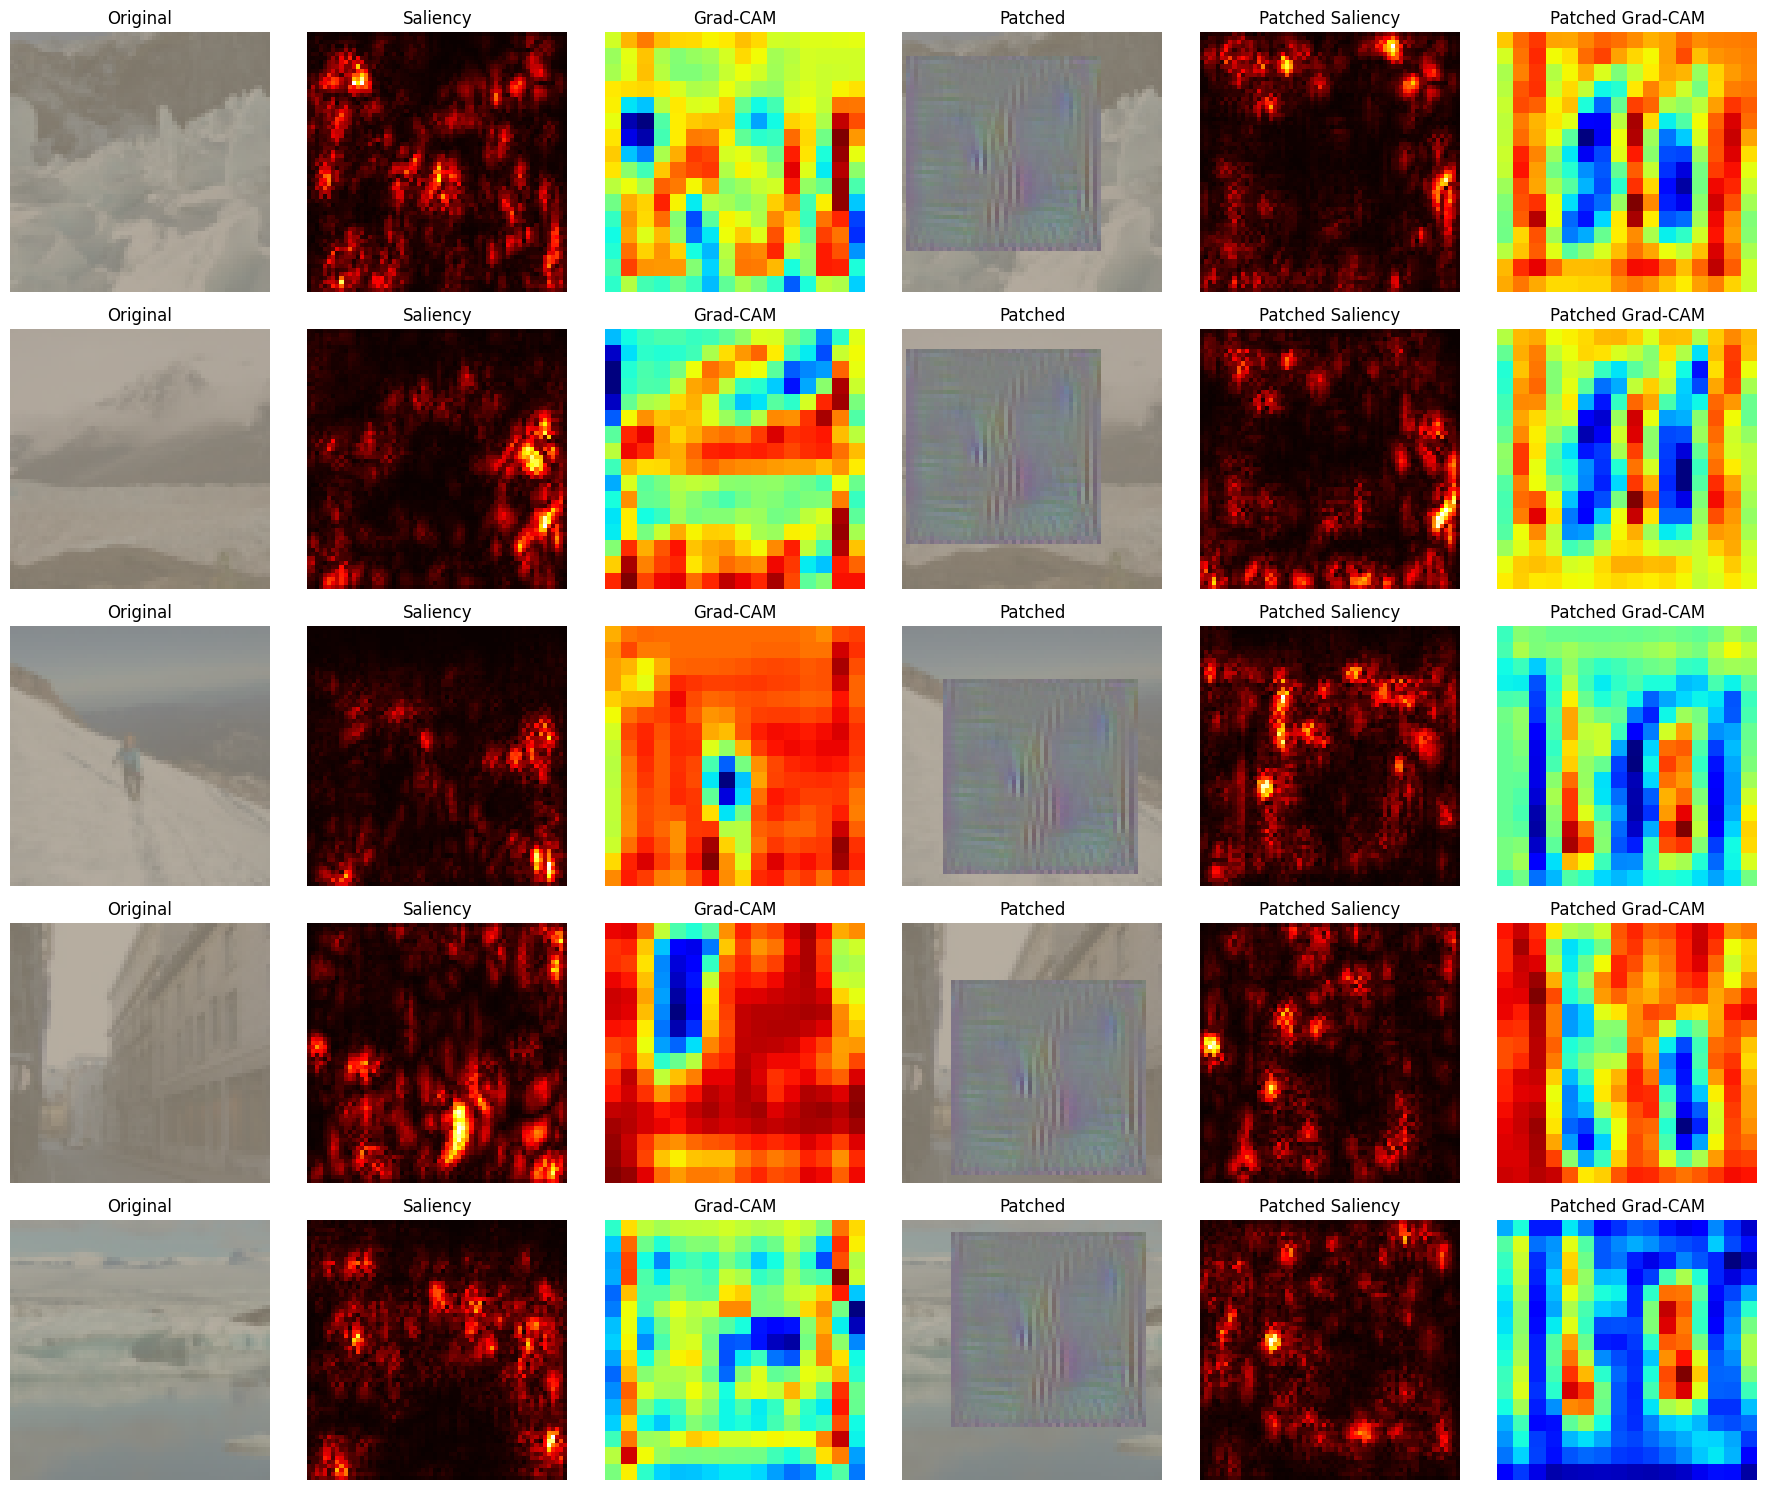

In [9]:
explainer.explain(
    images=images,
    labels=labels,
    patch=patch_dict["sea"][48]['patch'],
)